In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
import os
import pandas as pd

In [16]:
pd.__version__

'1.3.4'

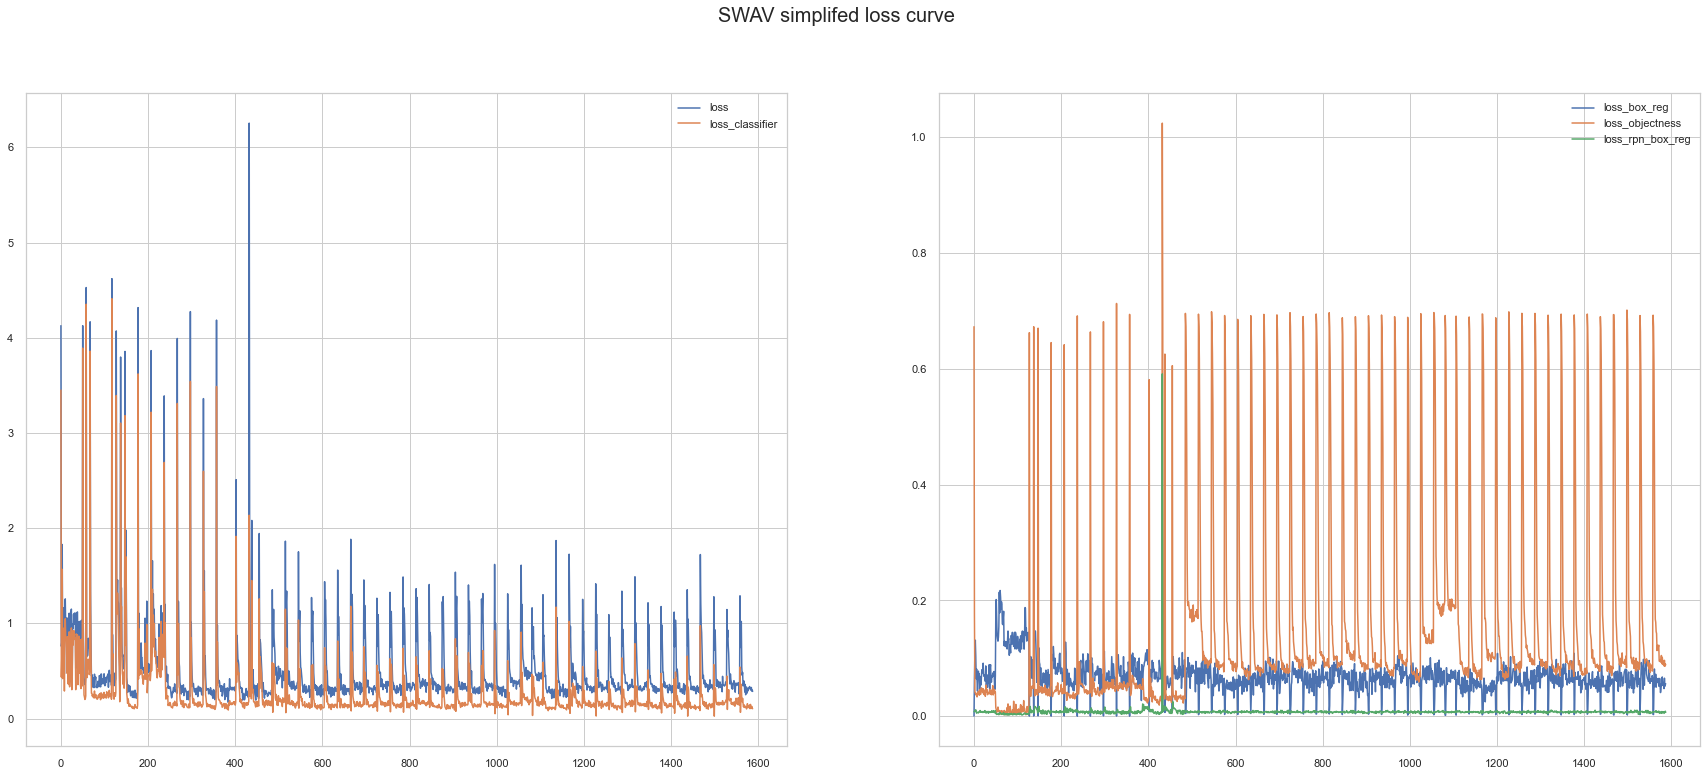

In [49]:
training_stats_file = "./back_up/train_stats_test.pkl"

plt.style.use('seaborn')
sns.set(style='whitegrid')
objects = []
with (open(training_stats_file, "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(30,12))
for n in objects[0].columns:
    if n == "Epoch":
        continue
    elif n == "loss" or n == "loss_classifier":
        objects[0].plot(y=n, ax=ax1, label=f'{n}')
    else:
        objects[0].plot(y=n, ax=ax2, label=f'{n}')

fig.suptitle('SWAV simplifed loss curve', fontsize=20)
plt.savefig('loss_curve.png')

In [53]:
objects[0]

,Epoch,loss,loss_classifier,loss_box_reg,loss_objectness,loss_rpn_box_reg
0,0.0050,4.126485,3.449643,0.000341,0.672450,0.007809
1,0.0050,0.758433,0.434733,0.065903,0.176500,0.008123
2,0.0050,0.800883,0.639683,0.108805,0.042759,0.009588
3,0.0005,1.828194,1.566910,0.131351,0.039708,0.009217
4,0.0005,0.556025,0.419325,0.104674,0.040209,0.011159
...,...,...,...,...,...,...
331,0.0050,0.453170,0.213832,0.082394,0.073171,0.008847
332,0.0050,0.396539,0.168785,0.096558,0.055727,0.015981
333,0.0050,0.414507,0.133916,0.113547,0.041783,0.014880
334,0.0050,3.381685,2.995901,0.285478,0.042001,0.007375


In [54]:
objects[0].drop(objects[0].tail(9).index,inplace=True)

In [50]:
import torch
model = torch.load("model_final.pth")

In [51]:
# print(model)
model.cpu()
model.eval()
y = model(torch.randn(2, 3, 400, 700))
print(y)

[{'boxes': tensor([[110.0073,   0.0000, 431.3301, 279.8506],
        [  9.3549,   0.0000, 330.4153, 211.1332],
        [378.8534,   0.0000, 700.0000, 211.1874],
        [149.6548,   0.0000, 595.7816, 166.7496],
        [428.4239,   0.0000, 648.4654, 331.3074],
        [ 91.9108,   0.0000, 312.0220, 365.5169],
        [  0.0000,  24.6838, 222.9572, 313.4972],
        [  0.0000, 139.6437, 391.7409, 335.4877],
        [216.4587,  72.3592, 662.9280, 268.1558],
        [277.7755,  91.9552, 599.1032, 381.1339],
        [260.0059,   0.0000, 480.2624, 331.6100],
        [115.8301, 173.6781, 561.8889, 369.0884],
        [ 13.9328, 241.0043, 461.1418, 400.0000],
        [485.7813,  58.4299, 700.0000, 347.5628],
        [344.5016, 160.1758, 666.6596, 400.0000],
        [182.6399, 240.9406, 629.3991, 400.0000],
        [355.5615, 105.9944, 700.0000, 301.9033],
        [  1.2260,  30.9519, 208.0326, 314.5994],
        [400.9825,   1.7257, 680.1688, 211.7493],
        [ 31.1376,   1.6526, 310.2932, 